In [2]:
import pandas as pd
import numpy as np

In [3]:
by0 = pd.read_csv('./Data/서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv', encoding='cp949')
by0

,대여일자,대여건수
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
450,2019-03-27,35832
451,2019-03-28,38806
452,2019-03-29,43893
453,2019-03-30,14001


In [3]:
by1 = pd.read_excel('./Data/서울특별시 공공자전거 일별 대여건수(2019.4_5).xlsx')
by1['대여일자'] = by1['대여일자'].astype('str')
by2 = pd.read_excel('./Data/서울특별시 공공자전거 일별 대여건수_20190601_20191130.xlsx')
by2.columns = ['대여일자', '대여건수']
by2['대여일자'] = by2['대여일자'].astype('str')
by3 = pd.read_excel('./Data/서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.xlsx')
by3.columns = ['대여일자', '대여건수']
by3['대여일자'] = by3['대여일자'].astype('str')
by4 = pd.read_excel('./Data/서울특별시 공공자전거 일별 대여건수_2020.06.01_2020.06.30.xlsx')
by4.columns = ['대여일자', '대여건수']
by4['대여일자'] = by4['대여일자'].astype('str')
by5 = pd.read_csv('./Data/서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.csv', encoding='cp949')
by5 = by5.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
by5.columns = ['대여일자', '대여건수']
lam = lambda x: x.replace(',', '')
by5 = by5.applymap(lam)
by5['대여건수'] = by5['대여건수'].astype('float64')
by6 = pd.read_csv('./Data/서울특별시 공공자전거 일별 대여건수_21.02.01_21.06.30.csv', encoding='cp949')
by6 = by6.dropna(axis=1, how='all')
by6 = by6.dropna(axis=0, how='all')
by6 = by6.applymap(lam)
by6.columns = ['대여일자', '대여건수']
by6['대여건수'] = by6['대여건수'].astype('float64')
by7 = pd.read_csv('./Data/서울특별시 공공자전거 일별 대여건수_21.07-21.12.csv', encoding='cp949')
by7 = by7.dropna(axis=1, how='all')
by7 = by7.dropna(axis=0, how='all')
by7 = by7.applymap(lam)
by7.columns = ['대여일자', '대여건수']
by7['대여건수'] = by7['대여건수'].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일자    61 non-null     object
 1   대여건수    61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


# 따릉이 가입자수 현황

In [21]:
by_join = pd.read_excel('./Data/서울특별시 공공자전거 신규가입자 정보(월별)_18.07_21.12.xlsx')
by_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가입일시    532 non-null    int64 
 1   사용자코드   532 non-null    object
 2   연령대코드   532 non-null    object
 3   성별      460 non-null    object
 4   가입 수    532 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 20.9+ KB


In [55]:
by_join.가입일시.unique()

array([201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902,
       201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910,
       201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006,
       202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102,
       202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110,
       202111, 202112], dtype=int64)

In [56]:
by_join['가입 수'].unique().sum()

2986302

In [57]:
for i in range(len(by_join)):
    year = by_join.가입일시.astype('str')[i][:4]
    month = by_join.가입일시.astype('str')[i][-2:]
    
    by_join.가입일시[i] = year + '-' + month

C:\Users\sec\AppData\Local\Temp\ipykernel_10216\3442190714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_join.가입일시[i] = year + '-' + month
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
by_join.columns = ['가입월', '사용자코드', '연령대코드', '성별', '가입수']
by_join1 = by_join.dropna(axis=1, how='any')
by_join1 = by_join1.drop(['사용자코드','연령대코드'], axis=1)
by_join1

,가입월,가입수
0,2018-07,67068
1,2018-07,2
2,2018-07,1
3,2018-08,51731
4,2018-09,114901
...,...,...
527,2021-12,6
528,2021-12,29
529,2021-12,43
530,2021-12,1


In [59]:
by_join_gr = by_join1.groupby('가입월')['가입수'].sum()
by_join_gr

가입월
2018-07     67071
2018-08     51731
2018-09    114901
2018-10     73366
2018-11     30423
2018-12     11047
2019-01     11749
2019-02     19078
2019-03     42546
2019-04     91019
2019-05    133965
2019-06    107798
2019-07     79457
2019-08     73898
2019-09     91846
2019-10     84091
2019-11     36515
2019-12     15627
2020-01     15407
2020-02     21246
2020-03    100046
2020-04    131456
2020-05    127535
2020-06    110181
2020-07    150779
2020-08     80535
2020-09    169497
2020-10    188869
2020-11     65033
2020-12     24788
2021-01     15074
2021-02     44796
2021-03     66084
2021-04     93907
2021-05     78922
2021-06     71941
2021-07     55969
2021-08     59736
2021-09     81525
2021-10     54004
2021-11     35843
2021-12     15444
Name: 가입수, dtype: int64

# 데이터 합치기

In [22]:
by_df = pd.concat([by0,by1,by2,by3,by4,by5,by6,by7], ignore_index=True)
by_df['대여건수'] = by_df['대여건수'].astype('int')
by_df['월'] = by_df['대여일자']
for i in range(0, 1608):
    by_df['월'][i] = by_df['대여일자'][i][:7]

In [28]:
by_df

,대여일자,대여건수,월
0,2018-01-01,4950,2018-01
1,2018-01-02,7136,2018-01
2,2018-01-03,7156,2018-01
3,2018-01-04,7102,2018-01
4,2018-01-05,7705,2018-01
...,...,...,...
1603,2021-12-27,42521,2021-12
1604,2021-12-28,51268,2021-12
1605,2021-12-29,52017,2021-12
1606,2021-12-30,48993,2021-12


In [87]:
by_gr = by_df.groupby('월')['대여건수'].sum()
by_gr

월
2019-04    1468000
2019-05    2232895
2019-06    2293879
2019-07    3955405
2019-08    4202368
2019-09    4168444
2019-10    4872802
2019-11    3074538
2019-12     882078
2020-01     794162
2020-02     762274
2020-03    1533535
2020-04    2157390
2020-05    2480330
2020-06    2770858
2020-07    2582511
2020-08    1733973
2020-09    2811990
2020-10    2891618
2020-11    1990070
2020-12    1196309
2021-01     812021
2021-02    1234546
2021-03    2184228
2021-04    3043238
2021-05    2950150
2021-06    3460407
2021-07    3377506
2021-08    3245974
2021-09    3736657
2021-10    3445929
2021-11    2737291
2021-12    1826746
Name: 대여건수, dtype: int32

In [31]:
by_df.to_excel('./Data/서울공공자전거일별대여건수(2018~21).xlsx')

In [95]:
by_gr_df = pd.DataFrame(by_gr)
# by_gr_df.to_excel('./Data/서울공공자전거월별대여건수.xlsx')
by_gr_df

,대여건수
월,
2019-04,1468000
2019-05,2232895
2019-06,2293879
2019-07,3955405
2019-08,4202368
2019-09,4168444
2019-10,4872802
2019-11,3074538
2019-12,882078


# 2018 따릉이이용 데이터까지 합치기

In [97]:
by_df_01 = pd.concat([by0,by1,by2,by3,by4,by5,by6,by7], ignore_index=True)
by_df_01['대여건수'] = by_df_01['대여건수'].astype('int')

In [98]:
by_df_01

,대여일자,대여건수
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
1603,2021-12-27,42521
1604,2021-12-28,51268
1605,2021-12-29,52017
1606,2021-12-30,48993


In [99]:
by_df_01['월'] = by_df_01['대여일자']

In [100]:
for i in range(0, 1608):
    by_df_01['월'][i] = by_df_01['대여일자'][i][:7]

C:\Users\sec\AppData\Local\Temp\ipykernel_10216\4210687919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_df_01['월'][i] = by_df_01['대여일자'][i][:7]


In [101]:
by_df_01

,대여일자,대여건수,월
0,2018-01-01,4950,2018-01
1,2018-01-02,7136,2018-01
2,2018-01-03,7156,2018-01
3,2018-01-04,7102,2018-01
4,2018-01-05,7705,2018-01
...,...,...,...
1603,2021-12-27,42521,2021-12
1604,2021-12-28,51268,2021-12
1605,2021-12-29,52017,2021-12
1606,2021-12-30,48993,2021-12


In [102]:
by_df_01_gr = by_df_01.groupby('월')['대여건수'].sum()
by_df_01_gr

월
2018-01     164367
2018-02     168741
2018-03     462661
2018-04     687885
2018-05     965609
2018-06    1207123
2018-07    1100015
2018-08    1037505
2018-09    1447993
2018-10    1420621
2018-11     961532
2018-12     500822
2019-01     495573
2019-02     471543
2019-03     904819
2019-04    1468000
2019-05    2232895
2019-06    2293879
2019-07    3955405
2019-08    4202368
2019-09    4168444
2019-10    4872802
2019-11    3074538
2019-12     882078
2020-01     794162
2020-02     762274
2020-03    1533535
2020-04    2157390
2020-05    2480330
2020-06    2770858
2020-07    2582511
2020-08    1733973
2020-09    2811990
2020-10    2891618
2020-11    1990070
2020-12    1196309
2021-01     812021
2021-02    1234546
2021-03    2184228
2021-04    3043238
2021-05    2950150
2021-06    3460407
2021-07    3377506
2021-08    3245974
2021-09    3736657
2021-10    3445929
2021-11    2737291
2021-12    1826746
Name: 대여건수, dtype: int32

In [104]:
by_01_gr_df = pd.DataFrame(by_df_01_gr)
by_01_gr_df = by_01_gr_df.reset_index()
by_01_gr_df

,월,대여건수
0,2018-01,164367
1,2018-02,168741
2,2018-03,462661
3,2018-04,687885
4,2018-05,965609
5,2018-06,1207123
6,2018-07,1100015
7,2018-08,1037505
8,2018-09,1447993
9,2018-10,1420621


In [107]:
by_01_gr_df.to_excel('./Data/서울따릉이월별대여건수(2018~21).xlsx')

In [105]:
by_01_gr_df

,월,대여건수
0,2018-01,164367
1,2018-02,168741
2,2018-03,462661
3,2018-04,687885
4,2018-05,965609
5,2018-06,1207123
6,2018-07,1100015
7,2018-08,1037505
8,2018-09,1447993
9,2018-10,1420621


In [67]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

<function matplotlib.pyplot.show(close=None, block=None)>

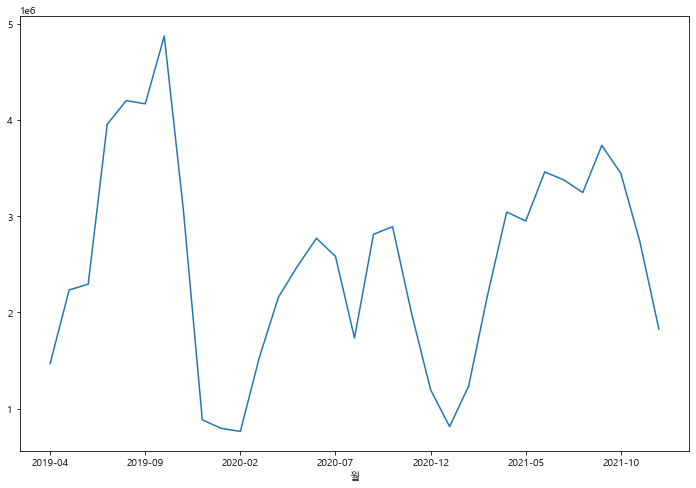

In [196]:
plt.figure(figsize = (12,8))
by_gr.plot()
plt.show

# 2018 추가한 따릉이 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

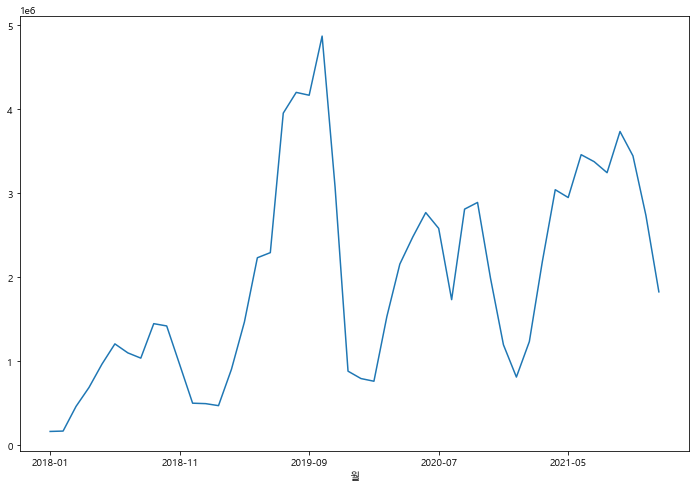

In [77]:
plt.figure(figsize = (12,8))
by_df_01_gr.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

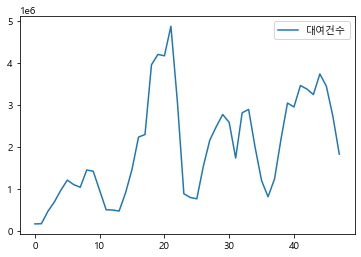

In [106]:
plt.figure(figsize = (12,8))
by_01_gr_df.plot()
plt.show

# 시간대별 따릉이 정보

In [15]:
import pandas as pd
import numpy as np

In [16]:
cy1 = pd.read_csv('./Data/서울특별시 공공자전거 이용정보(시간대별)_2019년/서울특별시 공공자전거 이용정보(시간대별)_19.01.csv')
# by1['대여일자'] = by1['대여일자'].astype('str')
cy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292732 entries, 0 to 292731
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    292732 non-null  object 
 1   대여시간    292732 non-null  int64  
 2   대여소번호   292732 non-null  int64  
 3   대여소명    292732 non-null  object 
 4   대여구분코드  292732 non-null  object 
 5   성별      292732 non-null  object 
 6   연령대코드   292732 non-null  object 
 7   이용건수    292732 non-null  int64  
 8   운동량     292732 non-null  float64
 9   탄소량     292732 non-null  float64
 10  이동거리    292732 non-null  float64
 11  사용시간    292732 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 26.8+ MB


In [17]:
cy1.head(20)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-01-01,0,458,458. 광화문역 5번출구,정기권,F,~10대,1,41.96,0.38,1630.0,29
1,2019-01-01,0,2159,2159. 인헌초교,정기권,F,20대,1,27.23,0.29,1250.0,7
2,2019-01-01,0,1362,1362. 보문역6번출구 앞,정기권,F,20대,1,20.18,0.23,980.0,5
3,2019-01-01,0,3106,3106. 홍남교 두바퀴쉼터,정기권,F,20대,1,7.48,0.10,420.0,4
4,2019-01-01,0,118,118. 광흥창역 2번출구 앞,정기권,F,20대,1,25.70,0.26,1100.0,7
5,2019-01-01,0,555,555. 구의3동주민센터,정기권,F,20대,1,86.55,0.55,2350.0,21
6,2019-01-01,0,1709,1709. 쌍문역4번출구 주변,정기권,F,20대,1,15.70,0.14,610.0,4
7,2019-01-01,0,2140,2140. 신림1교 교차로,정기권,F,20대,1,30.93,0.33,1420.0,9
8,2019-01-01,0,2145,2145. 은천초등학교 육교,정기권,F,20대,1,27.80,0.28,1190.0,8
9,2019-01-01,0,1241,1241. 문정 법조단지5,정기권,F,20대,1,65.12,0.59,2530.0,13


In [5]:
dda1 = pd.read_csv('./Data/공공자전거 대여소 정보(21.12월 기준).csv', encoding='cp949')
# by1['대여일자'] = by1['대여일자'].astype('str')
dda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여소
번호      2586 non-null   float64
 1   보관소(대여소)명   2586 non-null   object 
 2   소재지(위치)     2587 non-null   object 
 3   Unnamed: 3  2587 non-null   object 
 4   Unnamed: 4  2587 non-null   object 
 5   Unnamed: 5  2587 non-null   object 
 6   설치
시기       2586 non-null   object 
 7   설치형태        1402 non-null   object 
 8   Unnamed: 8  1189 non-null   object 
 9   운영
방식       2586 non-null   object 
dtypes: float64(1), object(9)
memory usage: 202.5+ KB


In [6]:
dda1.columns = ['대여소번호', '대여소명', '위치', '상세주소', '위도', '경도', '설치시기', '거치대수(LCD)', '거치대수(QR)','운영방식']
dda1 = dda1.drop(index=[0,1,2,3])
dda1

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기,거치대수(LCD),거치대수(QR),운영방식
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD
5,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015-09-06,14,NaN,LCD
6,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.55062866,126.9149857,2015-09-06,13,NaN,LCD
7,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.55000687,126.9148254,2015-09-06,5,NaN,LCD
8,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.54864502,126.9128265,2015-09-06,10,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2585,5070.0,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.5567627,126.8186951,2021-11-11,NaN,15,QR
2586,5072.0,김포공항입구 교통섬,강서구,공항동 74-5,37.56154633,126.8070831,2021-09-28,NaN,10,QR
2587,5073.0,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.54661942,126.8362351,2021-10-20,NaN,6,QR
2588,5074.0,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.55823517,126.8257599,2021-11-19,NaN,10,QR


In [7]:
dda1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 4 to 2589
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2586 non-null   float64
 1   대여소명       2586 non-null   object 
 2   위치         2586 non-null   object 
 3   상세주소       2586 non-null   object 
 4   위도         2586 non-null   object 
 5   경도         2586 non-null   object 
 6   설치시기       2586 non-null   object 
 7   거치대수(LCD)  1400 non-null   object 
 8   거치대수(QR)   1187 non-null   object 
 9   운영방식       2586 non-null   object 
dtypes: float64(1), object(9)
memory usage: 222.2+ KB


In [14]:
dda1['대여소번호'] = dda1['대여소번호'].astype('int')
dda1['위도'] = dda1['위도'].astype('float')
dda1['경도'] = dda1['경도'].astype('float')
dda2 = dda1[['대여소번호','위치','위도','경도']]
dda2 = dda2.reset_index(drop=True)
dda2

,대여소번호,위치,위도,경도
0,102,마포구,37.555649,126.910629
1,103,마포구,37.554951,126.910835
2,104,마포구,37.550629,126.914986
3,105,마포구,37.550007,126.914825
4,106,마포구,37.548645,126.912826
...,...,...,...,...
2581,5070,강서구,37.556763,126.818695
2582,5072,강서구,37.561546,126.807083
2583,5073,강서구,37.546619,126.836235
2584,5074,강서구,37.558235,126.825760


In [25]:
cy_df = pd.merge(cy1, dda2, how = 'left', on = '대여소번호')
cy_df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,위치,위도,경도
0,2019-01-01,0,458,458. 광화문역 5번출구,정기권,F,~10대,1,41.96,0.38,1630.0,29,종로구,37.574364,126.972366
1,2019-01-01,0,2159,2159. 인헌초교,정기권,F,20대,1,27.23,0.29,1250.0,7,관악구,37.475090,126.959228
2,2019-01-01,0,1362,1362. 보문역6번출구 앞,정기권,F,20대,1,20.18,0.23,980.0,5,성북구,37.583752,127.021950
3,2019-01-01,0,3106,3106. 홍남교 두바퀴쉼터,정기권,F,20대,1,7.48,0.10,420.0,4,NaN,NaN,NaN
4,2019-01-01,0,118,118. 광흥창역 2번출구 앞,정기권,F,20대,1,25.70,0.26,1100.0,7,마포구,37.547733,126.931763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292727,2019-01-31,23,1205,1205. 종합운동장역 4번출구,일일권,M,20대,1,275.43,1.75,7560.0,37,송파구,37.511280,127.078239
292728,2019-01-31,23,1611,1611. 과기대 입구(우),일일권,M,20대,1,294.39,2.74,11800.0,91,노원구,37.635109,127.068329
292729,2019-01-31,23,2104,2104. 사당역 5번출구,일일권,M,20대,1,30.51,0.27,1150.0,10,관악구,37.476089,126.981331
292730,2019-01-31,23,500,500. 어린이대공원역 3번출구 앞,일일권,M,30대,1,450.85,3.52,15180.0,102,광진구,37.537308,127.070351


## 따릉이데이터 for문사용해서 정제하기

In [12]:
path1 = './Data/서울특별시 공공자전거 이용정보(시간대별)_20'
path2 = '년/서울특별시 공공자전거 이용정보(시간대별)_'
path3 = './Data/서울특별시 공공자전거 이용정보(시간대별)_2019년/서울특별시 공공자전거 이용정보(시간대별)_19.'
# ./Data/서울특별시 공공자전거 이용정보(시간대별)_2020년/서울특별시 공공자전거 이용정보(시간대별)_20.01.csv
mon = ['01','02','03','04','05','06','07','08','09','10','11','12']


from tqdm.notebook import tqdm

In [13]:
for k in tqdm(mon):
    data19 = pd.read_csv(path3 + k + '.csv')
    data19_df = pd.merge(data19, dda2, how = 'left', on = '대여소번호')
    file_path = './[따릉이]이용정보_2019{}.xlsx'.format(k)
    data19.to_excel(file_path, index=False)
    

  0%|          | 0/12 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
for k in tqdm(mon):
    data19 = pd.read_csv(path3 + k + '.csv')
    data19_df = pd.merge(data19, dda2, how = 'left', on = '대여소번호')
    file_path = './[따릉이]이용정보_2019{}.xlsx'.format(k)
    data19.to_excel(file_path, index=False)

In [63]:
cs = pd.read_csv(path1 + '19' + path2 + '19.01.csv', encoding='utf-8')
cs

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-01-01,0,458,458. 광화문역 5번출구,정기권,F,~10대,1,41.96,0.38,1630.0,29
1,2019-01-01,0,2159,2159. 인헌초교,정기권,F,20대,1,27.23,0.29,1250.0,7
2,2019-01-01,0,1362,1362. 보문역6번출구 앞,정기권,F,20대,1,20.18,0.23,980.0,5
3,2019-01-01,0,3106,3106. 홍남교 두바퀴쉼터,정기권,F,20대,1,7.48,0.10,420.0,4
4,2019-01-01,0,118,118. 광흥창역 2번출구 앞,정기권,F,20대,1,25.70,0.26,1100.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
292727,2019-01-31,23,1205,1205. 종합운동장역 4번출구,일일권,M,20대,1,275.43,1.75,7560.0,37
292728,2019-01-31,23,1611,1611. 과기대 입구(우),일일권,M,20대,1,294.39,2.74,11800.0,91
292729,2019-01-31,23,2104,2104. 사당역 5번출구,일일권,M,20대,1,30.51,0.27,1150.0,10
292730,2019-01-31,23,500,500. 어린이대공원역 3번출구 앞,일일권,M,30대,1,450.85,3.52,15180.0,102
